<a href="https://colab.research.google.com/github/Mpr9640/Data_Augumentation/blob/main/Simple_Data_Augmentation_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

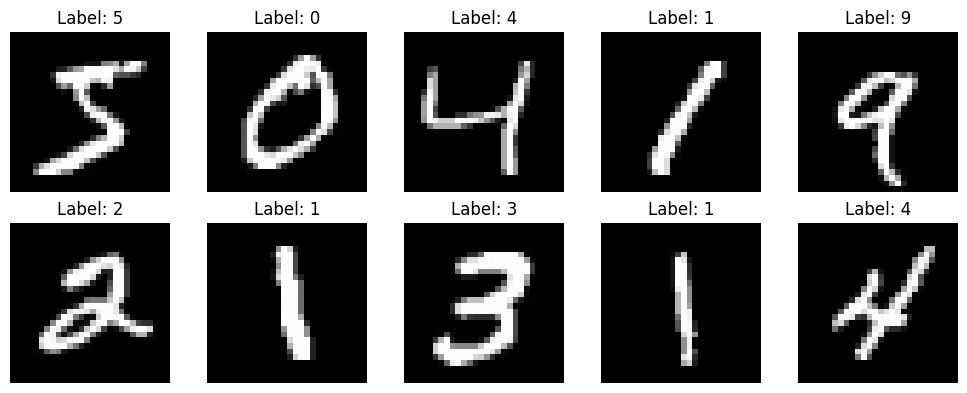

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data: Reshape and normalize
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Selecting a smaller subset for training to demonstrate how data augmentation can help
subset_indices = np.random.choice(train_images.shape[0], 500, replace=False)
train_images_subset = train_images[subset_indices]
train_labels_subset = train_labels[subset_indices]

# Function to display a grid of images
def display_images(images, labels, num_rows=2, num_cols=5):
    plt.figure(figsize=(10, 4))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the first few images and their labels
display_images(train_images, train_labels.argmax(axis=1))

In [ ]:
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_without_aug = create_model()
model_without_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_without_aug.fit(train_images_subset, train_labels_subset, epochs=100)

# Evaluate the model on the test set
test_loss, test_acc = model_without_aug.evaluate(test_images, test_labels)

print(f"test loss without augmentation: {test_loss}")
print(f"test accuracy without augmentation: {test_acc}")

Epoch 1/100


2024-04-11 01:20:21.877117: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-04-11 01:20:21.877142: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-11 01:20:21.877148: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-11 01:20:21.877200: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-11 01:20:21.877217: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


 1/16 [>.............................] - ETA: 5s - loss: 2.3144 - accuracy: 0.0000e+00

2024-04-11 01:20:22.264338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 13ms/step - loss: 1.6328 - accuracy: 0.4560
Epoch 2/100
16/16 [==============================] - 0s 10ms/step - loss: 0.7690 - accuracy: 0.7480
Epoch 3/100
16/16 [==============================] - 0s 10ms/step - loss: 0.4185 - accuracy: 0.8740
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 0.2626 - accuracy: 0.9180
Epoch 5/100
16/16 [==============================] - 0s 10ms/step - loss: 0.1391 - accuracy: 0.9540
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0989 - accuracy: 0.9700
Epoch 7/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0532 - accuracy: 0.9880
Epoch 8/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0334 - accuracy: 0.9940
Epoch 9/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0182 - accuracy: 1.0000
Epoch 10/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0123 - accuracy: 0.9980
Epoch 11/10

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

# Prepare the model
model_with_aug = create_model()
model_with_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

augmented_data_generator = data_augmentation.flow(train_images_subset, train_labels_subset, batch_size=32)

# Train the model with data augmentation
model_with_aug.fit(augmented_data_generator, epochs=100)

# Evaluate the target_model on the test set
test_loss, test_acc = model_with_aug.evaluate(test_images, test_labels)

print(f"test loss with augmentation: {test_loss}")
print(f"test accuracy with augmentation: {test_acc}")

Epoch 1/100
16/16 [==============================] - 0s 13ms/step - loss: 2.1984 - accuracy: 0.2060
Epoch 2/100
16/16 [==============================] - 0s 10ms/step - loss: 1.6708 - accuracy: 0.4100
Epoch 3/100
16/16 [==============================] - 0s 10ms/step - loss: 1.2972 - accuracy: 0.5840
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 1.0981 - accuracy: 0.6440
Epoch 5/100
16/16 [==============================] - 0s 10ms/step - loss: 0.8208 - accuracy: 0.7420
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 0.7743 - accuracy: 0.7660
Epoch 7/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5872 - accuracy: 0.8080
Epoch 8/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5392 - accuracy: 0.8340
Epoch 9/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5927 - accuracy: 0.8020
Epoch 10/100
16/16 [==============================] - 0s 10ms/step - loss: 0.4591 - accuracy: 0.8540